In [1]:
import numpy as np

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from functools import reduce
 
def parse_if_number(s): 
    try: return float(s) 
    except: return True if s=="true" else False if s=="false" else s if s else None 
 
def parse_ndarray(s): 
    return np.fromstring(s, sep=' ') if s else None 

In [3]:
# vector Name
pdr_vector = 'tbDecoded:vector'
pdr_dist_vector = 'txRxDistanceTB:vector'
# pdr_recv_vector = 'tbReceived:vector'

csvName = [
#     'test-3d9m.csv', 
#     'test-1bco.csv'
#     'test-g474.csv', 
#     'test-clfv.csv', 
#     'test-sztm.csv', 
#     'test-n_zl.csv', 
#     'test-9m5l.csv'
#     'test-n_zl-2.csv', # Aircomp Lust
#     'test-p58c.csv',  # CAM Lust New
#     'test-ts_i.csv' # Base Lust
#     'test-g474.csv', # Aircomp simple
#     'test-nfq5.csv',  # CAM simple
#     'test-eh9i.csv' # Base simepl
#     'test-vaa6.csv',  # Aircomp simepl
#     'test-ffdl.csv',  # CAM simepl
#     'test-g7ia.csv',  # Aircomp simepl
#     'test-efyj.csv',  # Aircomp simepl
#     'test-2k5e.csv',  # Aircomp simepl 500dura
    
#     'test-w9wv.csv',  # Aircomp simepl 10dura
#     'test-lp5t.csv',  # CAM simepl 10dura
#     'test-u6jr.csv',  # Base simepl 100dur
#     'test-r9ur.csv',  # AIrcomp simepl 100dur
#     'test-vq14.csv',  # AIrcomp simepl 20dur
#     'test-lf8x.csv',  # AIrcomp simepl 50dur
#     'test-gi4c.csv',  # AIrcomp simepl 70dur
#     'test-h1f1.csv',  # Base simepl 100dura
#     'test-4dvv.csv',  # Base simepl 10dura
#     'test-0w6z.csv',  # AIrcomp lust 70dur
#     'test-m7n1.csv',  # AIrcomp lust 80dur
#     'test-jvlc.csv',  # AIrcomp Lust 100dur
#     'test-l1n_.csv',  # AIrcomp Lust 90dur
    'test-tiou.csv',  # AIrcomp Lust 92dur
#     'test-wvbp.csv',  # CAM lust 10dur
    'test-ug7h.csv',  # CAM lust 10dur new
#     'test-1hkq.csv',  # Base lust 100dur
#     'test-8t5y.csv',  # Base lust 10dur
    'test-hjpb.csv',  # CAM BS lust 10dur
]

radi = 500
bin_siz = 50

In [4]:

#  opp_scavetool export -f 
#     '("tbDecoded:vector" OR "txRxDistanceTB:vector" OR "tbReceived:vector" 
#         OR "periodCAM:vector" OR "periodCAM:mean" OR "selfTE:vector" OR "selfTE:mean" 
#         OR "minTTC:vector" OR "minTTC:mean" OR "maxDRAC:vector" OR "maxDRAC:mean"
#         OR "leader:vector" OR "leader:mean")' 
#  -F CSV-R 
# CAM-0-20221109-09\:16\:01-10447.sca CAM-0-20221109-09\:16\:01-10447.vec -o test-sztm.csv

for x in range(len(csvName)): 
    print(csvName[x])

test-tiou.csv
test-ug7h.csv
test-hjpb.csv


In [5]:
def PacketDeliveryRate(filename, case):
    
    print(filename)
    
    x = []
    y = []
    distances = []
    decoded = []
#     received = []
    
    df = pd.read_csv("./CSV/"+filename, converters = { 
        'attrvalue': parse_if_number, 
        'binedges': parse_ndarray, 
        'binvalues': parse_ndarray, 
        'vectime': parse_ndarray, 
        'vecvalue': parse_ndarray
    })
    distances = df[(df["name"] == pdr_dist_vector) & (df["vectime"].notnull())] 
    decoded = df[(df["name"] == pdr_vector) & (df["vectime"].notnull())] 
#     received = df[(df["name"] == pdr_recv_vector) & (df["vectime"].notnull())] 
    distances = distances[["module", "vecvalue"]] 
    distances.rename(columns={"vecvalue": "distance"}, inplace=True) 
    decoded   = decoded[["module", "vecvalue"]] 
    decoded.rename(columns={"vecvalue": "decode"}, inplace=True) 
#     received   = received[["module", "vecvalue"]] 
#     received.rename(columns={"vecvalue": "received"}, inplace=True) 

#     distances.info()
#     decoded.info()
#     received.info()
    
#     new_df.append(pd.merge(distances, decoded, on='module', how='inner'))
#     new_df = pd.merge(distances, decoded, on='module', how='inner')
#     new_df = pd.merge(new_df, received, on='module', how='inner')

#     data_frames = [distances, decoded, received]
    data_frames = [distances, decoded]
    new_df = reduce(lambda  left,right: pd.merge(left,right,on=['module'], how='inner'), data_frames)
    
#     display(new_df)

#     with open('Data_OLD/'+ filename+'_Periodic_RTC.csv','r') as csvfile:
#         lines = csv.reader(csvfile, delimiter=',')
#         for row in lines:
#             x.append(float(row[0]))
#             y.append(float(row[1])) 
    
    bins = []
    print(radi, "/", bin_siz, "=", radi/bin_siz)
    for i in range(int(radi/bin_siz)): 
        bins.append({"count": 0, "success": 0}) 
 
    for row in new_df.itertuples(): 
        for i in range(len(row.distance)): 
            if row.distance[i] < radi: 
                # Ensures that we have everything in 10m chunks 
                remainder = int(row.distance[i] // bin_siz) 
#                 if row.received[i] >= 0 and row.decode[i] >= 0: 
                if row.decode[i] >=0:
                    # Only count TBs sent i.e. -1 will be ignored in result 
                    bins[remainder]["count"] += 1 
#                     bins[remainder]["count"] += row.received[i] 
                    bins[remainder]["success"] += row.decode[i] 
                      
    pdrs = [] 
    distances = [] 
    distance = 0 
    for dictionary in bins: 
        if dictionary["count"]>0:
            pdrs.append((dictionary["success"] / dictionary["count"] * 100)) 
#             pdrs.append((dictionary["success"])) 
        else: 
            print('error: ', distance)
            pdrs.append((dictionary["success"] / 1 * 100)) 
        distances.append(distance) 
        distance += bin_siz
    
    plt.plot(distances, pdrs, label = case)
#     plt.plot((distances, pdrs, 'o-', color='blue', label = "RTC+", markevery=5, lw=1.2)  
#     plt.plot(x,y, 'o-', color='blue', label = "RTC+", markevery=5, lw=1.2)  
    #plt.plot(x2,y2, '*-', color='magenta', label = "Aperiodic", markevery=5, lw=2)
#     plt.plot(x3,y3, '>-', color='green', label = r"$\Delta_x$ = 50ms", markevery=5, lw=1.2)
#     plt.plot(x4,y4, 'x-', color='red', label = r"$\Delta_x$ = 100ms", markevery=5, lw=1.2)  
    plt.xlim([0, 500])
    plt.ylim([0, 110])
    plt.xlabel('Distance (m)')
    plt.ylabel('PDR (%)')
#     plt.grid()
#     plt.legend()

test-tiou.csv
500 / 50 = 10.0
test-ug7h.csv
500 / 50 = 10.0
test-hjpb.csv
500 / 50 = 10.0


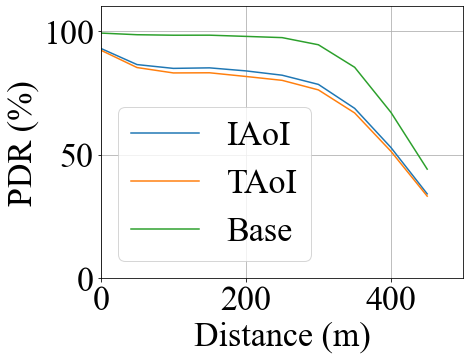

In [6]:
import matplotlib.pyplot as plt
import csv
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
fig = plt.figure(figsize=(6.5, 5))
plt.rcParams.update({
    'font.size': 34, 
    "font.family": "serif", 
    "font.serif": ["Times New Roman"]
})

PacketDeliveryRate(csvName[0], "IAoI")
PacketDeliveryRate(csvName[1], "TAoI")
PacketDeliveryRate(csvName[2], "Base")

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.legend()
# plt.legend(loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2),mode="expand", borderaxespad=0, ncol=3)
# plt.tight_layout()
# plt.subplots_adjust(top=0.8, bottom=0.2, left=0.23, right=0.95)
plt.grid()
plt.savefig("Results_PacketDelivery_Lust_92.pdf")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


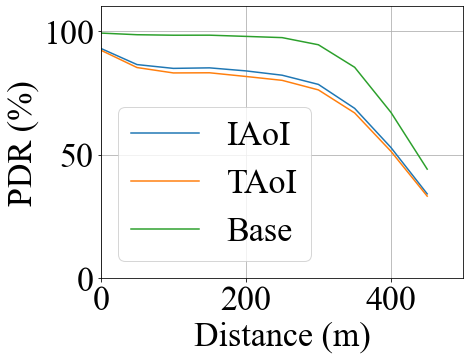

In [7]:
# fig.gca().set_ylim([0, 110])
# fig.gca().set_xlim([0, 500])
fig.gca().set_xlabel('Distance (m)')
fig.gca().set_ylabel('PDR (%)')
# fig.legend()
# fig.gca().legend(loc="lower left", bbox_to_anchor=(0, 1.02, 1, 0.2),mode="expand", borderaxespad=0, ncol=3)
# fig.subplots_adjust(top=0.95, bottom=0.2, left=0.23, right=0.95)
# fig.gca().grid()
fig.savefig("Results_PacketDelivery_Lust_ba.eps", format='eps', bbox_inches='tight')
fig